In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pefile==2017.9.3


  Using cached pefile-2017.9.3-py3-none-any.whl
  Attempting uninstall: pefile
    Found existing installation: pefile 2019.4.18
    Uninstalling pefile-2019.4.18:
      Successfully uninstalled pefile-2019.4.18



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pefile==2019.4.18

  Using cached pefile-2019.4.18-py3-none-any.whl
  Attempting uninstall: pefile
    Found existing installation: pefile 2017.9.3
    Uninstalling pefile-2017.9.3:
      Successfully uninstalled pefile-2017.9.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional

In [9]:
# Input Dataset 

DM = pd.read_csv("C:\\Users\\Muhammad Raihan\\Downloads\\Obfuscated-MalMem2022.csv") #DM--> Dataset Malware

In [10]:
# Menapilkan head (5 Data Teratas)

DM.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [11]:
# Menampilkan Tail (5 Data Terbawah)

DM.tail()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [12]:
# Menampilkan nama Kolom yang ada pada dataset

DM.columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [13]:
# Menampilkan Kesimpulan Atribut Numerik

DM.describe(include="all")

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
count,58596,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000,58596
unique,28346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,29298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29298
mean,NaN,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,...,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881,NaN
std,NaN,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,...,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929,NaN
min,NaN,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,...,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000,NaN
25%,NaN,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,...,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000,NaN
50%,NaN,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,...,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000,NaN
75%,NaN,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,...,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000,NaN


In [14]:
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [15]:
DM["Class"].value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

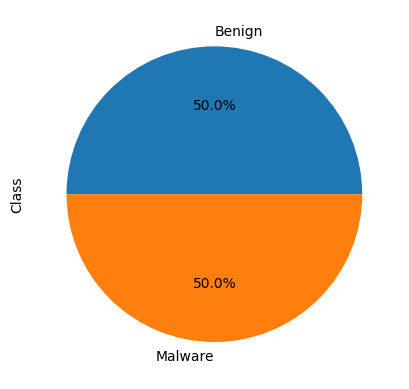

In [16]:
#Visualisasi

DM["Class"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [17]:
#Feature Selection
X = DM.drop(['Category','Class'],axis=1).values    #Droping this because classification model will not accept object type elements (float and int only)
# Target variable
y = DM['Class'].values

In [18]:
#Data Fitting and choosing the important variables
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

In [19]:
#Number of important features
nbfeatures

14

In [20]:
#splitting the data (70% - training and 30% - testing)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.29, stratify = y)

In [21]:
features = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

In [22]:
#All the required features
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, DM.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(DM.columns[2+f])

1. feature ldrmodules.not_in_load (0.139678)
2. feature handles.nhandles (0.124143)
3. feature handles.ndesktop (0.079393)
4. feature dlllist.avg_dlls_per_proc (0.071180)
5. feature svcscan.shared_process_services (0.066079)
6. feature svcscan.fs_drivers (0.064249)
7. feature handles.ndirectory (0.051932)
8. feature ldrmodules.not_in_mem (0.043911)
9. feature svcscan.kernel_drivers (0.041480)
10. feature svcscan.interactive_process_services (0.035902)
11. feature handles.nthread (0.032099)
12. feature handles.nsection (0.023717)
13. feature pslist.nprocs64bit (0.020468)
14. feature ldrmodules.not_in_load_avg (0.019341)


In [23]:
#Memisahkan data benign dan data malwares
BenignData = DM[DM['Class'] == "Benign"]
MalwareData = DM[DM['Class'] == "Malware"]

<function matplotlib.pyplot.show(close=None, block=None)>

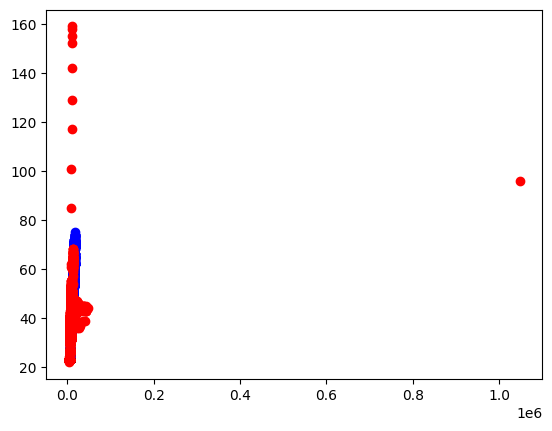

In [24]:
# Scatter Plot perbandingan antara Jumlah Handles dan Jumlah Desktop pada sistem
plt.scatter(BenignData["handles.nhandles"],BenignData["handles.ndesktop"], color = "blue")
plt.scatter(MalwareData["handles.nhandles"],MalwareData["handles.ndesktop"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

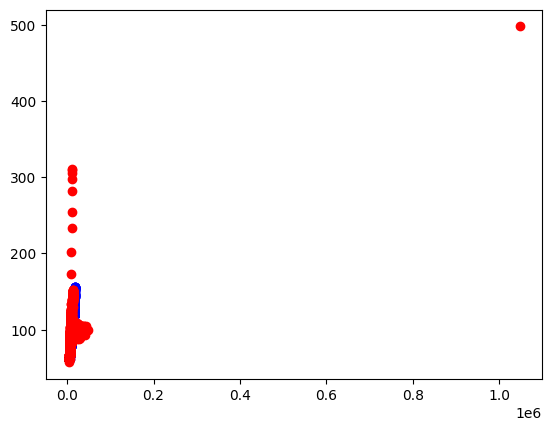

In [25]:
# Scatter Plot perbandingan antara Jumlah Handles dan Jumlah direktori pada sistem
plt.scatter(BenignData["handles.nhandles"],BenignData["handles.ndirectory"], color = "blue")
plt.scatter(MalwareData["handles.nhandles"],MalwareData["handles.ndirectory"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

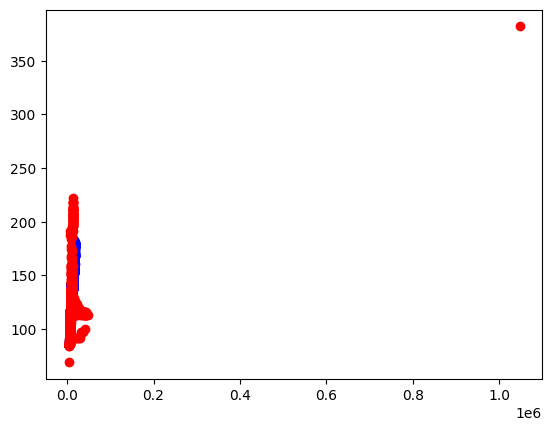

In [26]:
# Scatter Plot perbandingan antara Jumlah Handles dan Jumlah waktu penanganannya
plt.scatter(BenignData["handles.nhandles"],BenignData["handles.ntimer"], color = "blue")
plt.scatter(MalwareData["handles.nhandles"],MalwareData["handles.ntimer"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

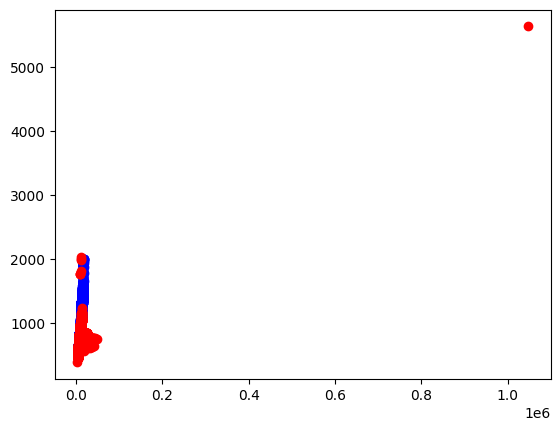

In [27]:
# Scatter Plot perbandingan antara Jumlah Handles dan jumlah thread yang dihandle oleh suatu proses atau sistem.
plt.scatter(BenignData["handles.nhandles"],BenignData["handles.nthread"], color = "blue")
plt.scatter(MalwareData["handles.nhandles"],MalwareData["handles.nthread"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

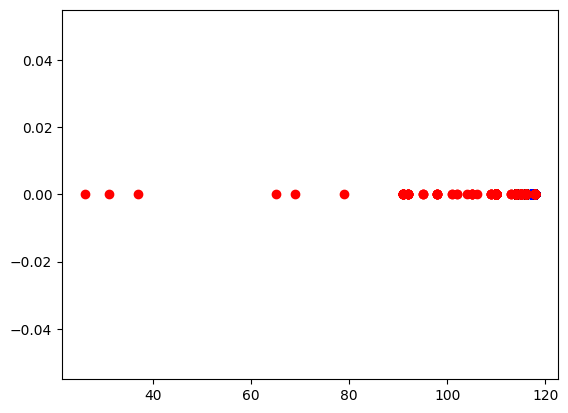

In [28]:
# Scatter Plot perbandingan antara jumulah pemindaian layanan yang terkait dengan proses bersama dan jumlah hasilnya.
plt.scatter(BenignData["svcscan.shared_process_services"],BenignData["svcscan.interactive_process_services"], color = "blue")
plt.scatter(MalwareData["svcscan.shared_process_services"],MalwareData["svcscan.interactive_process_services"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

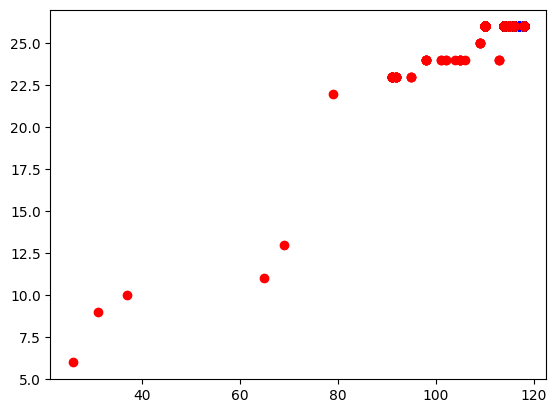

In [29]:
# Scatter Plot perbandingan antara jumulah pemindaian layanan yang terkait dengan proses bersama dan jumlah hasilnya berhubungan dengan file system.
plt.scatter(BenignData["svcscan.shared_process_services"],BenignData["svcscan.fs_drivers"], color = "blue")
plt.scatter(MalwareData["svcscan.shared_process_services"],MalwareData["svcscan.fs_drivers"], color = "red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

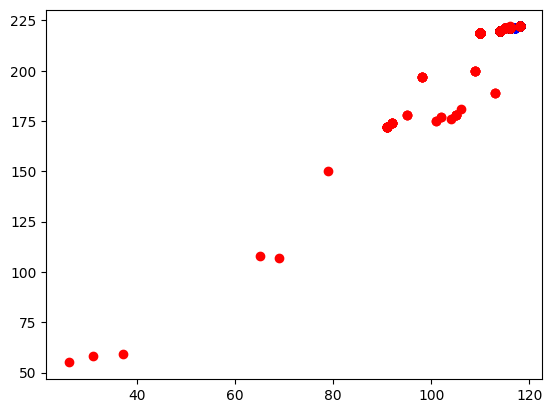

In [30]:
# Scatter Plot perbandingan antara jumulah pemindaian layanan yang terkait dengan proses bersama dan jumlah hasilnya berhubungan dengan karnel pada sistem.
plt.scatter(BenignData["svcscan.shared_process_services"],BenignData["svcscan.kernel_drivers"], color = "blue")
plt.scatter(MalwareData["svcscan.shared_process_services"],MalwareData["svcscan.kernel_drivers"], color = "red")
plt.show

In [31]:
#plt.scatter(BenignData["handles.nhandles"],BenignData["svcscan.shared_process_services"],BenignData["ldrmodules.not_in_load"],BenignData["dlllist.avg_dlls_per_proc"],BenignData["handles.ndesktop"],BenignData["svcscan.interactive_process_services"],BenignData["ldrmodules.not_in_mem"],BenignData["pslist.nprocs64bit"],BenignData["ldrmodules.not_in_load_avg"],BenignData["handles.ndirectory"],BenignData["handles.ntimer"],BenignData["svcscan.fs_drivers"],BenignData["svcscan.kernel_drivers"],BenignData["ldrmodules.not_in_init"],BenignData["handles.nthread"],BenignData["ldrmodules.not_in_init_avg"],color = 'blue')
#plt.scatter(MalwareData["handles.nhandles"],MalwareData["svcscan.shared_process_services"],MalwareData["ldrmodules.not_in_load"],MalwareData["dlllist.avg_dlls_per_proc"],MalwareData["handles.ndesktop"],MalwareData["svcscan.interactive_process_services"],MalwareData["ldrmodules.not_in_mem"],MalwareData["pslist.nprocs64bit"],MalwareData["ldrmodules.not_in_load_avg"],MalwareData["handles.ndirectory"],MalwareData["handles.ntimer"],MalwareData["svcscan.fs_drivers"],MalwareData["svcscan.kernel_drivers"],MalwareData["ldrmodules.not_in_init"],MalwareData["handles.nthread"],MalwareData["ldrmodules.not_in_init_avg"],color = 'red')
#plt.show

In [32]:
importantFeaturesName = []
for f in range(nbfeatures):
    importantFeaturesName.append(DM.columns[2+index[f]])

print(importantFeaturesName)

['ldrmodules.not_in_load', 'handles.nhandles', 'handles.ndesktop', 'dlllist.avg_dlls_per_proc', 'svcscan.shared_process_services', 'svcscan.fs_drivers', 'handles.ndirectory', 'ldrmodules.not_in_mem', 'svcscan.kernel_drivers', 'svcscan.interactive_process_services', 'handles.nthread', 'handles.nsection', 'pslist.nprocs64bit', 'ldrmodules.not_in_load_avg']


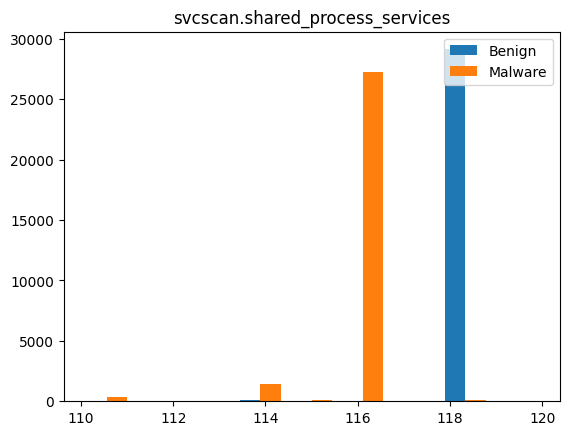

In [33]:
import numpy as np

x = BenignData["svcscan.shared_process_services"]
y = MalwareData["svcscan.shared_process_services"]
bins = np.linspace(110, 120, 10)

plt.title("svcscan.shared_process_services")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

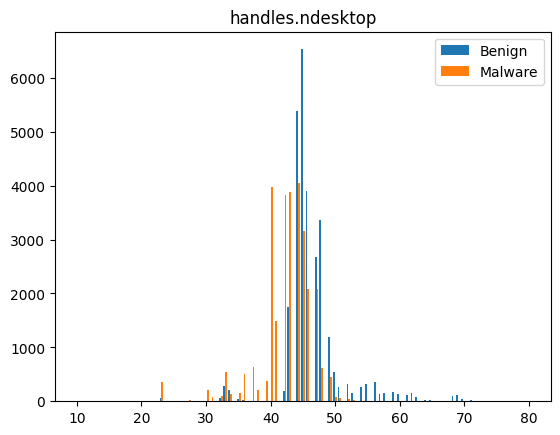

In [34]:
x = BenignData["handles.ndesktop"]
y = MalwareData["handles.ndesktop"]
bins = np.linspace(10, 80, 100)

plt.title("handles.ndesktop")
plt.hist([x, y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

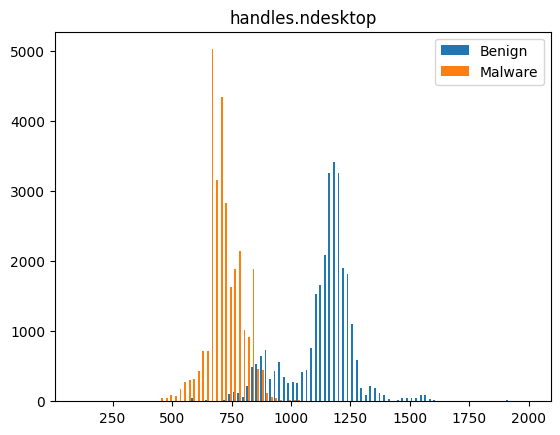

In [35]:
x = BenignData["handles.nthread"]
y = MalwareData["handles.nthread"]
bins = np.linspace(100, 2000, 100)

plt.title("handles.ndesktop")
plt.hist([x, y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

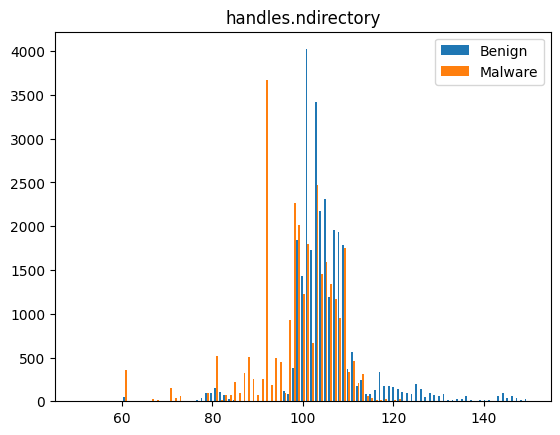

In [36]:
x = BenignData["handles.ndirectory"]
y = MalwareData["handles.ndirectory"]
bins = np.linspace(50, 150, 100)

plt.title("handles.ndirectory")
plt.hist([x, y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

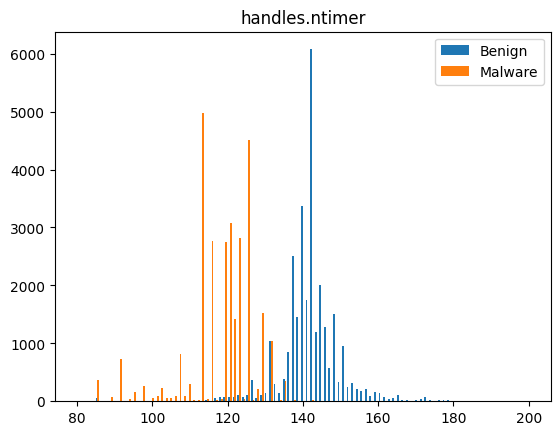

In [37]:
x = BenignData["handles.ntimer"]
y = MalwareData["handles.ntimer"]
bins = np.linspace(80,200, 100)
plt.title("handles.ntimer")
plt.hist([x, y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [38]:
BenignData.describe(include="all")

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
count,29298,29298.000000,29298.000000,29298.000000,29298.0,29298.000000,29298.000000,29298.000000,29298.000000,29298.000000,...,29298.000000,29298.0,29298.000000,29298.000000,29298.0,29298.000000,29298.000000,29298.0,29298.0,29298
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,29298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29298
mean,NaN,42.540822,13.573008,12.597405,0.0,284.880989,2082.521776,48.924703,12119.022356,286.779605,...,221.990545,26.0,26.231518,117.981808,0.0,123.839614,87.738617,0.0,8.0,NaN
std,NaN,4.673019,2.422646,0.968639,0.0,18.939775,213.493923,2.711415,1171.206961,17.464056,...,0.126980,0.0,1.296775,0.251242,0.0,1.667371,0.439396,0.0,0.0,NaN
min,NaN,22.000000,8.000000,9.058824,0.0,201.371795,911.000000,34.538462,5176.000000,208.270833,...,220.000000,26.0,24.000000,114.000000,0.0,113.000000,87.000000,0.0,8.0,NaN
25%,NaN,40.000000,12.000000,12.058131,0.0,272.250770,2000.000000,47.313763,11703.000000,275.569362,...,222.000000,26.0,25.000000,118.000000,0.0,123.000000,87.000000,0.0,8.0,NaN
50%,NaN,42.000000,12.000000,12.838047,0.0,289.654995,2086.000000,49.605378,12185.000000,291.260052,...,222.000000,26.0,27.000000,118.000000,0.0,123.000000,88.000000,0.0,8.0,NaN
75%,NaN,44.000000,15.000000,13.268293,0.0,299.858580,2154.000000,50.727273,12616.750000,301.045982,...,222.000000,26.0,27.000000,118.000000,0.0,125.000000,88.000000,0.0,8.0,NaN


In [39]:
MalwareData.describe(include="all")

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
count,29298,29298.000000,29298.000000,29298.000000,29298.0,29298.000000,29298.000000,29298.000000,2.929800e+04,29298.000000,...,29298.000000,29298.000000,29298.000000,29298.00000,29298.0,29298.000000,29298.000000,29298.000000,29298.000000,29298
unique,28345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Spyware-Transponder-0dc41f8927fd25152c4304cf86...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malware
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29298
mean,NaN,40.248720,15.854666,10.085905,0.0,210.138650,1539.089119,38.490909,8.398146e+03,212.342311,...,220.822616,25.992491,23.895317,115.77722,0.0,120.151478,86.072701,0.001707,7.999761,NaN
std,NaN,6.503098,2.375832,0.976143,0.0,147.894349,155.796880,2.038905,6.251329e+03,198.889683,...,2.689017,0.241477,0.518621,1.52127,0.0,2.521070,4.250289,0.041276,0.015456,NaN
min,NaN,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,...,55.000000,6.000000,7.000000,26.00000,0.0,30.000000,50.000000,0.000000,7.000000,NaN
25%,NaN,38.000000,15.000000,9.615385,0.0,202.365854,1473.000000,37.863636,8.028000e+03,203.119048,...,221.000000,26.000000,24.000000,116.00000,0.0,119.000000,86.000000,0.000000,8.000000,NaN
50%,NaN,40.000000,16.000000,9.973684,0.0,208.725000,1557.000000,38.840909,8.414000e+03,209.650000,...,221.000000,26.000000,24.000000,116.00000,0.0,121.000000,87.000000,0.000000,8.000000,NaN
75%,NaN,42.000000,17.000000,10.242424,0.0,214.371429,1619.000000,39.184211,8.695000e+03,215.048490,...,221.000000,26.000000,24.000000,116.00000,0.0,122.000000,87.000000,0.000000,8.000000,NaN


In [40]:
estimators = [("Naive Bayes", GaussianNB()),
              ("DecisionTree", DecisionTreeClassifier(max_depth=10)),
              ("RandomForest", ek.RandomForestClassifier(n_estimators=50))
]

In [41]:
# Testing which Classifier will give better result
model = { "DecisionTree": DecisionTreeClassifier(max_depth=10),
        "RandomForest":ek.RandomForestClassifier(n_estimators=50),
        "Logistic Regression": LogisticRegression(random_state=0, max_iter=10000),
        "Naive Bayes": GaussianNB(),
        "MLP": MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
        "Stochastic Gradient Descent": SGDClassifier(loss="hinge", penalty="l2", max_iter=10000),
        "ADA Boost": AdaBoostClassifier(n_estimators=100),
        "Stack Ensamble": StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
        }
modelDL = {
        "DNN" : Sequential([Dense(128, input_shape=(X_train.shape[1],), activation='relu'), Dense(64, activation='relu'), Dense(1, activation='sigmoid')]), # Adjust output layer based on your problem (e.g., softmax for multi-class)
        "CNN" : Sequential([Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[0], X_train.shape[1])), MaxPooling1D(pool_size=2),Conv1D(64, kernel_size=3, activation='relu'),MaxPooling1D(pool_size=2), Flatten(), Dense(128, activation='relu'), Dense(1, activation='sigmoid')]), # Adjust output layer based on your problem (e.g., softmax for multi-class) 
        "RNN" : Sequential([SimpleRNN(32, activation='relu', input_shape=(X_train.shape[0], X_train.shape[1])),Dense(1, activation='sigmoid')]), # Adjust output layer based on your problem (e.g., softmax for multi-class)
        "LSTM" : Sequential([LSTM(64, activation='relu', input_shape=(X_train.shape[0], X_train.shape[1])),Dense(1, activation='sigmoid')]), # Adjust output layer based on your problem (e.g., softmax for multi-class)
        "GRU" : Sequential([GRU(64, activation='relu', input_shape=(X_train.shape[0], X_train.shape[1])), Dense(1, activation='sigmoid')]),
        "Bidirectional RNN or LSTM" : Sequential([Bidirectional(LSTM(64, activation='relu'), input_shape=(X_train.shape[0], X_train.shape[1])), Dense(1, activation='sigmoid')])

}

In [42]:
results = {}
for algo in model:
    clf = model[algo]
    
    #Waktu awal training
    start_time = time.time()
    
    clf.fit(X_train,y_train)
    # Waktu akhir training
    end_time = time.time()
    
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    
    # Menghitung total waktu training
    training_time = end_time - start_time
    print("Total Training Time:", training_time, "seconds")
    
    results[algo] = score

DecisionTree : 0.9996469134349438 
Total Training Time: 0.1890571117401123 seconds
RandomForest : 0.9999411522391572 
Total Training Time: 1.301088571548462 seconds


C:\Users\Muhammad Raihan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 0.9989995880656741 
Total Training Time: 14.955268383026123 seconds
Naive Bayes : 0.9943506149591008 
Total Training Time: 0.04616260528564453 seconds
MLP : 0.4999705761195786 
Total Training Time: 1.3224835395812988 seconds
Stochastic Gradient Descent : 0.9927028776555052 
Total Training Time: 0.18027591705322266 seconds
ADA Boost : 0.9998823044783146 
Total Training Time: 7.666121959686279 seconds
Stack Ensamble : 0.9999411522391572 
Total Training Time: 7.087076663970947 seconds


In [ ]:
# Testing time juga..

In [43]:
"""
for algo in modelDL:
    clf = modelDL[algo]
    clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    clf.fit(X_train,y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
    score = clf.evaluate(X_test, y_test)
    accuracy = score[1]
    print("%s : %s " % (algo, accuracy))
    results[algo] = score
"""

'\nfor algo in modelDL:\n    clf = modelDL[algo]\n    clf.compile(optimizer=\'adam\', loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    clf.fit(X_train,y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))\n    score = clf.evaluate(X_test, y_test)\n    accuracy = score[1]\n    print("%s : %s " % (algo, accuracy))\n    results[algo] = score\n'

In [44]:
winner = max(results, key=results.get)# Selecting the classifier with good result
print("Using", winner, "for classification, with",len(features), 'features.')

Using RandomForest for classification, with 14 features.


In [46]:
# Waktu awal training
import time
start_time = time.time()

# Melakukan thresholding
BenignDataThreshold = DM[DM["svcscan.shared_process_services"] > 117]
MalwareDataThreshold = DM[DM["svcscan.shared_process_services"] <= 117]

# Waktu akhir training
end_time = time.time()

# menentukan TP, TN, FP, FN
from sklearn.metrics import confusion_matrix

# Untuk BenignDataThreshold
y_true_benign = ["Benign"] * len(BenignDataThreshold)
y_pred_benign = BenignDataThreshold["Class"]

# Untuk MalwareDataThreshold
y_true_malware = ["Malware"] * len(MalwareDataThreshold)
y_pred_malware = MalwareDataThreshold["Class"]

# Menyatukan true labels dan predicted labels
y_true = y_true_benign + y_true_malware
y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

# Menghitung confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

print("")

# Menghitung Precision, Recall, F1-score, dan Accuracy

PrecisionThreshold = tp/(tp+fp)
RecallThreshold = tp/(tp+fn)
F1ScoreThreshold = 2 * ((PrecisionThreshold*RecallThreshold)/(PrecisionThreshold+RecallThreshold))
AccuracyThreshold = (tp+tn)/(tp+fp+tn+fn)

# Mengambil satu baris dari dataset untuk pengujian
testData = DM.sample(n=1, random_state=42)

# Waktu awal test
start_time_test = time.time()

if testData["svcscan.shared_process_services"].values[0] > 117:
    predTest = 'Benign'
else:
    predTest = 'Malware'

if predTest == testData['Class'].values[0]:
    print("Test Benar")
else:
    print("Test Salah")

# Waktu akhir test
end_time_test = time.time()

print("Precision:", PrecisionThreshold)
print("Recall:", RecallThreshold)
print("F1-Score:", F1ScoreThreshold)
print("Accuracy:", AccuracyThreshold)

# Menghitung total waktu training
training_time = end_time - start_time
print("Total Training Time:", training_time, "seconds")

# Menghitung total waktu test
test_time = end_time_test - start_time_test
print("Total Testing Time:", test_time, "seconds")

True Negative: 29120
False Positive: 69
False Negative: 178
True Positive: 29229

Test Benar
Precision: 0.9976448904362073
Recall: 0.9939470194171456
F1-Score: 0.9957925219316924
Accuracy: 0.9957846952010376
Total Training Time: 0.014625787734985352 seconds
Total Testing Time: 0.0 seconds


In [ ]:
# Testing time harusnya ambil 1 row dan bandingkan dengan if else saja.

In [329]:
#Mencoba Random Forest untuk setiap fitur

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time

# Assuming X contains your features and y contains your labels

X = DM[['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.not_in_eprocess_pool_false_avg',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_pspcid_list_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg',
       'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.fs_drivers', 'svcscan.process_services',
       'svcscan.shared_process_services',
       'svcscan.interactive_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric']]

y = DM["Class"] 


# Split the data into training and testing sets with the same random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50)

# Dictionary to store results
results = {}

# Iterate through each feature
for feature in X.columns:
    # Waktu awal training
    start_time = time.time()
    # Select the current feature
    X_feature = X[[feature]]

    # Fit the Random Forest classifier
    rf_classifier.fit(X_feature.loc[X_train.index], y_train)

    # Calculate accuracy on the test set
    score = rf_classifier.score(X_feature.loc[X_test.index], y_test)
    
    # Waktu akhir training
    end_time = time.time()
    
    # Print and store the results
    print(f"{feature} : {score}")
    results[feature] = score
    # Menghitung total waktu training
    training_time = end_time - start_time
    print("Total Training Time:", training_time, "seconds")

print("")
# Find the feature with the highest score
winner = max(results, key=results.get)

# Get the corresponding score
best_score = results[winner]

print(f"The best feature is '{winner}' with a score of {best_score}.")

pslist.nproc : 0.6581911262798635
Total Training Time: 1.0363855361938477 seconds
pslist.nppid : 0.8420648464163822
Total Training Time: 0.8502101898193359 seconds
pslist.avg_threads : 0.9731228668941979
Total Training Time: 8.547844171524048 seconds
pslist.nprocs64bit : 0.49402730375426623
Total Training Time: 0.6769590377807617 seconds
pslist.avg_handlers : 0.9862627986348123
Total Training Time: 7.480027198791504 seconds
dlllist.ndlls : 0.9790102389078499
Total Training Time: 4.301818609237671 seconds
dlllist.avg_dlls_per_proc : 0.9935153583617747
Total Training Time: 4.433287143707275 seconds
handles.nhandles : 0.9802047781569966
Total Training Time: 6.181611776351929 seconds
handles.avg_handles_per_proc : 0.9847269624573379
Total Training Time: 6.649191617965698 seconds
handles.nport : 0.49402730375426623
Total Training Time: 0.616929292678833 seconds
handles.nfile : 0.9595563139931741
Total Training Time: 3.2770042419433594 seconds
handles.nevent : 0.9842150170648464
Total Traini

In [330]:
# Mencoba Deep Neural Decision Forest

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# feature selection
X = DM[features] # --> Feature Selection
y = (DM['Class'] == 'Malware').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, stratify=y)

In [331]:
class NeuralDecisionTree(keras.Model):
    def __init__(self, depth, num_features, used_features_rate, num_classes):
        super().__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.num_classes = num_classes

        # Create a mask for the randomly selected features.
        num_used_features = int(num_features * used_features_rate)
        one_hot = np.eye(num_features)
        sampled_feature_indicies = np.random.choice(
            np.arange(num_features), num_used_features, replace=False
        )
        self.used_features_mask = one_hot[sampled_feature_indicies]

        # Initialize the weights of the classes in leaves.
        self.pi = tf.Variable(
            initial_value=tf.random_normal_initializer()(
                shape=[self.num_leaves, self.num_classes]
            ),
            dtype="float32",
            trainable=True,
        )

        # Initialize the stochastic routing layer.
        self.decision_fn = layers.Dense(
            units=self.num_leaves, activation="sigmoid", name="decision"
        )

    def call(self, features):
        batch_size = tf.shape(features)[0]

        # Apply the feature mask to the input features.
        features = tf.matmul(
            features, self.used_features_mask, transpose_b=True
        )  # [batch_size, num_used_features]
        # Compute the routing probabilities.
        decisions = tf.expand_dims(
            self.decision_fn(features), axis=2
        )  # [batch_size, num_leaves, 1]
        # Concatenate the routing probabilities with their complements.
        decisions = layers.concatenate(
            [decisions, 1 - decisions], axis=2
        )  # [batch_size, num_leaves, 2]

        mu = tf.ones([batch_size, 1, 1])

        begin_idx = 1
        end_idx = 2
        # Traverse the tree in breadth-first order.
        for level in range(self.depth):
            mu = tf.reshape(mu, [batch_size, -1, 1])  # [batch_size, 2 ** level, 1]
            mu = tf.tile(mu, (1, 1, 2))  # [batch_size, 2 ** level, 2]
            level_decisions = decisions[
                :, begin_idx:end_idx, :
            ]  # [batch_size, 2 ** level, 2]
            mu = mu * level_decisions  # [batch_size, 2**level, 2]
            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (level + 1)

        mu = tf.reshape(mu, [batch_size, self.num_leaves])  # [batch_size, num_leaves]
        probabilities = keras.activations.softmax(self.pi)  # [num_leaves, num_classes]
        outputs = tf.matmul(mu, probabilities)  # [batch_size, num_classes]
        return outputs

In [332]:
class NeuralDecisionForest(keras.Model):
    def __init__(self, num_trees, depth, num_features, used_features_rate, num_classes):
        super().__init__()
        self.ensemble = []
        # Initialize the ensemble by adding NeuralDecisionForest instances.
        # Each tree will have its own randomly selected input features to use.
        for _ in range(num_trees):
            self.ensemble.append(
                NeuralDecisionTree(depth, num_features, used_features_rate, num_classes)
            )

    def call(self, inputs):
        # Initialize the outputs: a [batch_size, num_classes] matrix of zeros.
        batch_size = tf.shape(inputs)[0]
        outputs = tf.zeros([batch_size, num_classes])

        # Aggregate the outputs of trees in the ensemble.
        for tree in self.ensemble:
            outputs += tree(inputs)
        # Divide the outputs by the ensemble size to get the average.
        outputs /= len(self.ensemble)
        return outputs

In [333]:
learning_rate = 0.01
num_classes = 2  # Assuming binary classification (malware or not)
batch_size = 265
num_epochs = 100
num_trees = 25
depth = 5
used_features_rate = 0.5

def create_forest_model():
    input_shape = X_train.shape[1]
    inputs = layers.Input(shape=(input_shape,))
    normalized_inputs = layers.BatchNormalization()(inputs)

    forest_model = NeuralDecisionForest(
        num_trees, depth, input_shape, used_features_rate, num_classes=num_classes
    )

    outputs = forest_model(normalized_inputs)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

forest_model = create_forest_model()

def run_experiment(model, X_train, y_train, X_test, y_test):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    print("Start training the model...")
    # Waktu awal training
    start_time = time.time()
    
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

    # Waktu akhir training
    end_time = time.time()
    
    print("Model training finished")

    print("Evaluating the model on the test data...")
    # Convert y_test to a 1D array and make sure it's an integer array
    y_test = y_test.astype(int)
    _, accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    # Make predictions on the test set
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Waktu awal test
    start_time_test = time.time()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Waktu akhir test
    end_time_test = time.time()

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Menghitung total waktu training
    training_time = end_time - start_time
    print("Total Training Time:", training_time, "seconds")

    # Menghitung total waktu test
    test_time = end_time_test - start_time_test
    print("Total Test Time:", test_time, "seconds")

run_experiment(forest_model, X_train, y_train, X_test, y_test)

Start training the model...
Epoch 1/100
126/126 [==============================] - 30s 59ms/step - loss: 0.2973 - sparse_categorical_accuracy: 0.9735 - val_loss: 1.3096 - val_sparse_categorical_accuracy: 0.5031
Epoch 2/100
126/126 [==============================] - 4s 35ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.1368 - val_sparse_categorical_accuracy: 0.9542
Epoch 3/100
126/126 [==============================] - 4s 35ms/step - loss: 0.0346 - sparse_categorical_accuracy: 0.9940 - val_loss: 0.0332 - val_sparse_categorical_accuracy: 0.9933
Epoch 4/100
126/126 [==============================] - 4s 34ms/step - loss: 0.0252 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0220 - val_sparse_categorical_accuracy: 0.9954
Epoch 5/100
126/126 [==============================] - 4s 35ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9955 - val_loss: 0.0179 - val_sparse_categorical_accuracy: 0.9953
Epoch 6/100
126/126 [==============================] - 4s 35m

In [348]:
import time
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'DM' is your DataFrame
X = DM[features]
y = (DM['Class'] == 'Malware').astype(int)

# Convert y to a 1D array and make sure it's an integer array
y = y.values.astype(int)

# Define the number of folds
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Function to create the forest model
def create_forest_model():
    input_shape = X.shape[1]
    inputs = layers.Input(shape=(input_shape,))
    normalized_inputs = layers.BatchNormalization()(inputs)

    forest_model = NeuralDecisionForest(
        num_trees, depth, input_shape, used_features_rate, num_classes=num_classes
    )

    outputs = forest_model(normalized_inputs)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Function to run the experiment with cross-validation
def run_experiment_with_cv(model, X, y, skf):
    fold_results = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print(f"\nFold {fold}:")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=[keras.metrics.SparseCategoricalAccuracy()],
        )

        print("Start training the model...")
        start_time = time.time()
        model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)
        end_time = time.time()
        print("Model training finished")

        print("Evaluating the model on the test data...")
        _, accuracy = model.evaluate(X_test, y_test)
        print(f"Test accuracy: {round(accuracy * 100, 2)}%")

        y_test = y_test.astype(int)
        y_pred = np.argmax(model.predict(X_test), axis=1)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

        training_time = end_time - start_time
        print("Total Training Time:", training_time, "seconds")

        fold_results.append({
            "fold": fold,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "training_time": training_time,
        })

    return fold_results

# Run the experiment with cross-validation
results = run_experiment_with_cv(create_forest_model(), X, y, skf)

# Display average performance metrics across all folds
avg_accuracy = np.mean([result["accuracy"] for result in results])
avg_precision = np.mean([result["precision"] for result in results])
avg_recall = np.mean([result["recall"] for result in results])
avg_f1 = np.mean([result["f1"] for result in results])
avg_training_time = np.mean([result["training_time"] for result in results])

print("\nAverage Performance Metrics Across Folds:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average Training Time: {avg_training_time:.4f} seconds")



Fold 1:
Start training the model...
Epoch 1/100
160/160 [==============================] - 33s 56ms/step - loss: 0.2505 - sparse_categorical_accuracy: 0.9791 - val_loss: 2.7073 - val_sparse_categorical_accuracy: 0.0500
Epoch 2/100
160/160 [==============================] - 6s 37ms/step - loss: 0.0491 - sparse_categorical_accuracy: 0.9907 - val_loss: 0.1874 - val_sparse_categorical_accuracy: 0.9615
Epoch 3/100
160/160 [==============================] - 6s 37ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9925 - val_loss: 0.1214 - val_sparse_categorical_accuracy: 0.9931
Epoch 4/100
160/160 [==============================] - 6s 37ms/step - loss: 0.0232 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.0636 - val_sparse_categorical_accuracy: 0.9945
Epoch 5/100
160/160 [==============================] - 6s 37ms/step - loss: 0.0192 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0605 - val_sparse_categorical_accuracy: 0.9953
Epoch 6/100
160/160 [==============================]

In [49]:
hasil_threshold = []

def Thresholding(threshold):
    # Melakukan thresholding
    BenignDataThreshold = DM[DM["svcscan.shared_process_services"] > int(threshold)]
    MalwareDataThreshold = DM[DM["svcscan.shared_process_services"] <= int(threshold)]

    # menentukan TP, TN, FP, FN
    from sklearn.metrics import confusion_matrix

    # Untuk BenignDataThreshold
    y_true_benign = ["Benign"] * len(BenignDataThreshold)
    y_pred_benign = BenignDataThreshold["Class"]

    # Untuk MalwareDataThreshold
    y_true_malware = ["Malware"] * len(MalwareDataThreshold)
    y_pred_malware = MalwareDataThreshold["Class"]

    # Menyatukan true labels dan predicted labels
    y_true = y_true_benign + y_true_malware
    y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    #print("True Negative:", tn)
    #print("False Positive:", fp)
    #print("False Negative:", fn)
    #print("True Positive:", tp)

    #print("")

    # Menghitung Precision, Recall, F1-score, dan Accuracy

    PrecisionThreshold = tp/(tp+fp)
    RecallThreshold = tp/(tp+fn)
    F1ScoreThreshold = 2 * ((PrecisionThreshold*RecallThreshold)/(PrecisionThreshold+RecallThreshold))
    AccuracyThreshold = (tp+tn)/(tp+fp+tn+fn)

    #print("Precision:", PrecisionThreshold)
    #print("Recall:", RecallThreshold)
    #print("F1-Score:", F1ScoreThreshold)
    #print("Accuracy:", AccuracyThreshold)

    matrix = [[threshold],[PrecisionThreshold],[RecallThreshold],[F1ScoreThreshold],[AccuracyThreshold]]
    hasil_threshold.append(matrix)


Max = DM['svcscan.shared_process_services'].max()
Min = DM['svcscan.shared_process_services'].min()

for x in range(Min,Max+1):
    Thresholding(x)

print(hasil_threshold)

[[[26], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[27], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[28], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[29], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[30], [3.413202266366305e-05], [1.0], [6.826171541690844e-05], [0.5000170660113318]], [[31], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[32], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[33], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[34], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[35], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[36], [6.82640453273261e-05], [1.0], [0.00013651877133105802], [0.5000341320226637]], [[37], [0.00010239606799098914], [1.0], [0

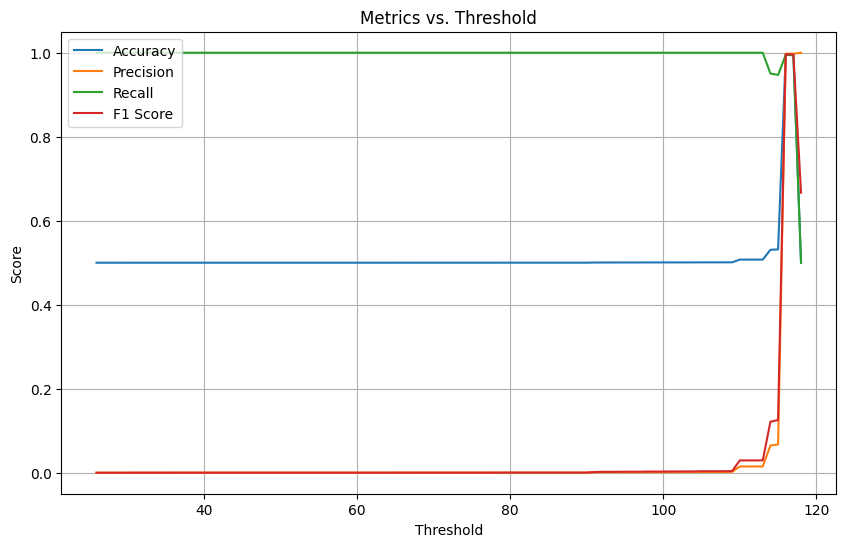

In [50]:
#Plot, sumbu x treshold dan sumbu y nya akurasinya
# Pisahkan hasil menjadi list berdasarkan kolom
thresholds, precision, recall, f1_score, accuracy = zip(*hasil_threshold)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, f1_score, label='F1 Score')

plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [345]:
winner = [[0],[0],[0],[0],[0]]
for x in range(0,(len(hasil_threshold)-1)):
    i = hasil_threshold[x]
    if i[4] >= winner[4]:
        winner = i

print("Dengan menggunakan threshold ",winner[0]," menghasilkan presisi ",winner[1],", lalu Recall ", winner[2], ", F1-score ",winner[3],", dan Akurasi ", winner[4], " yang menjadikan angka threshold tersebut adalah threshold terbaik yang dapat digunakan.")

Dengan menggunakan threshold  [116]  menghasilkan presisi  [0.9976448904362073] , lalu Recall  [0.9950297872340426] , F1-score  [0.996335622858896] , dan Akurasi  [0.9963308075636562]  yang menjadikan angka threshold tersebut adalah threshold terbaik yang dapat digunakan.


In [ ]:
# Sumbu y pakai log